## ETS Models

### SES, Holt & Holt-Winter Model

### Exponential Smoothing methods
#####  Exponential smoothing methods consist of flattening time series data. 
##### Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.
##### Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).
##### One or more parameters control how fast the weights decay.
##### These parameters have values between 0 and 1


### SES -  ETS(A, N, N) - Simple smoothing with additive errors


###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.

In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

### Example 1

The dataset, oil gives the annual production (millions of tonnes), Saudi Arabia, 1965- 2013.
* Forecast using SES model.
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error


def parser(x):
       return pd.datetime.strptime(x, '%Y')

series  =  pd.read_csv('oildata.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True, date_parser = parser)
print('Data range : ',  len(series))


Data range :  12


In [2]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [3]:
pred = ets.ExponentialSmoothing(series, trend = None, damped = False, seasonal = None).fit()
print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(pred.params['smoothing_level'], 4))
print('Initial Level', np.round(pred.params['initial_level'], 4))
print('')
y_pred = pred.forecast(steps = 3)
y_pred = pd.DataFrame(y_pred)
y_pred

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)



== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.7955
Initial Level 446.7952



,0
2008-01-01,493.281902
2009-01-01,493.281902
2010-01-01,493.281902


In [4]:
y_pred1    =  pred.predict(start = series.index[0])

rmse       =  np.sqrt(mean_squared_error(series, y_pred1))
mape       =  MAPE(series, y_pred1)

print('RMSE is %3.4f'  %rmse)
print('MAPE1 is %3.2f' %mape)


RMSE is 24.7839
MAPE1 is 4.21


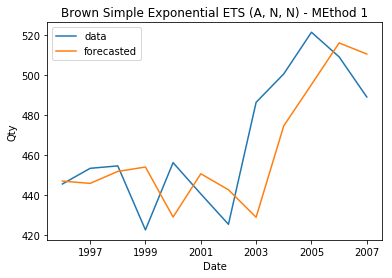

In [5]:
fig1, ax = plt.subplots()
ax.plot(series, label = 'data')
ax.plot(y_pred1, label = 'forecasted')
plt.legend(loc = 'upper left')
plt.title('Brown Simple Exponential ETS (A, N, N) - MEthod 1')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

### Train and Test data

###### We build the model using the training dataset.
###### We evalaute the model and predict using the test dataset.
###### We do this by selecting an arbitary split point in the ordered list of observations and creating training and test datasets. 

### Example 2

We have the petrol data from Jan 2001 to Sep 2013.
* Split the data into train and test in the ratio 70:30
* Use Single Exponential Smoothing method to forecast sales using the test data.
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')
                               0      

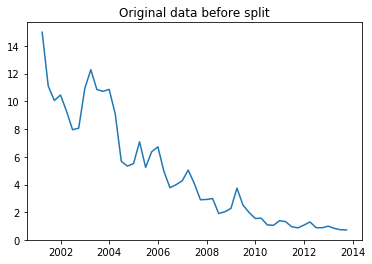


 Training data start at 

   Year Quarter  Consumption  TimeIndex
0  2001      Q1       14.978 2001-03-31 ['Year', 'Quarter']

 Training data ends at 

    Year Quarter  Consumption  TimeIndex
34  2009      Q3      1.98159 2009-09-30 ['Year', 'Quarter']

 Test data start at 

    Year Quarter  Consumption  TimeIndex
35  2009      Q4      1.55221 2009-12-31 ['Year', 'Quarter']

 Test data ends at 

    Year Quarter  Consumption  TimeIndex
50  2013      Q3      0.72823 2013-09-30 ['Year', 'Quarter']


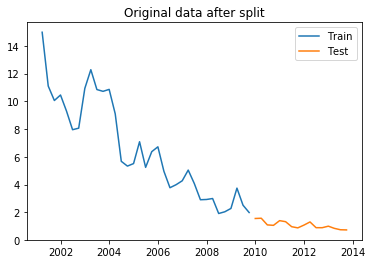

In [6]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

Petrol              =  pd.read_csv('Petrol.csv')

date_rng            =  pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
print(date_rng)

Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
print(Petrol.head(3).T)

plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.title('Original data before split')
plt.show()

#Creating train and test set 

train             = Petrol[0:int(len(Petrol)*0.7)] 
test              = Petrol[int(len(Petrol)*0.7):]

print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Quarter'])
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Quarter'])

print("\n Test data start at \n")
print (test[test.TimeIndex == test.TimeIndex.min()],['Year','Quarter'])

print("\n Test data ends at \n")
print (test[test.TimeIndex == test.TimeIndex.max()],['Year','Quarter'])

plt.plot(train.TimeIndex, train.Consumption, label = 'Train')
plt.plot(test.TimeIndex, test.Consumption,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

We will try with various values of $\alpha$ such as 0.1, 0.5 and 0.99 and then let the model optimize $\alpha$.

A value close to 1 indicates fast learning (that is, only the most recent values influence the forecasts), whereas a value close to 0 indicates slow learning (past observations have a large influence on forecasts).

— Page 89, Practical Time Series Forecasting with R, 2016.

https://www.amazon.com/Practical-Time-Forecasting-Hands-Analytics/dp/0997847913/ref=as_li_ss_tl?ie=UTF8&qid=1527636709&sr=8-5&keywords=time+series+forecasting&linkCode=sl1&tag=inspiredalgor-20&linkId=dcb38fa9efe5af617b48b2922c4c149f

In [7]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Consumption']))

For alpha = 0.10,  RMSE is 3.0712 MAPE is 283.19


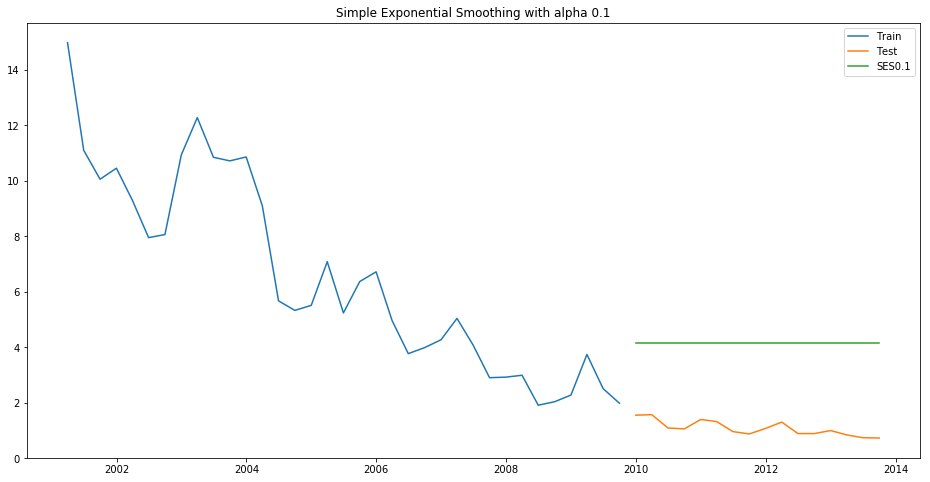

For alpha = 0.50,  RMSE is 1.3166 MAPE is 119.40


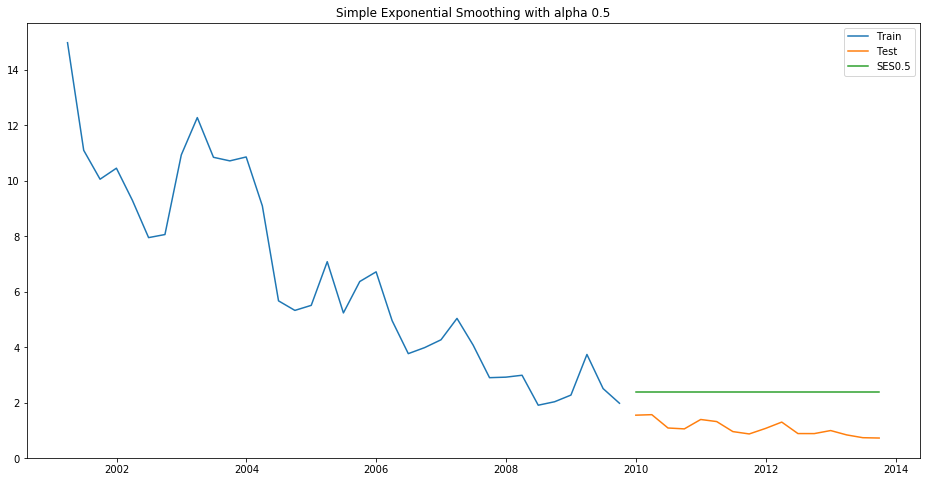

For alpha = 0.99,  RMSE is 0.9438 MAPE is 83.89


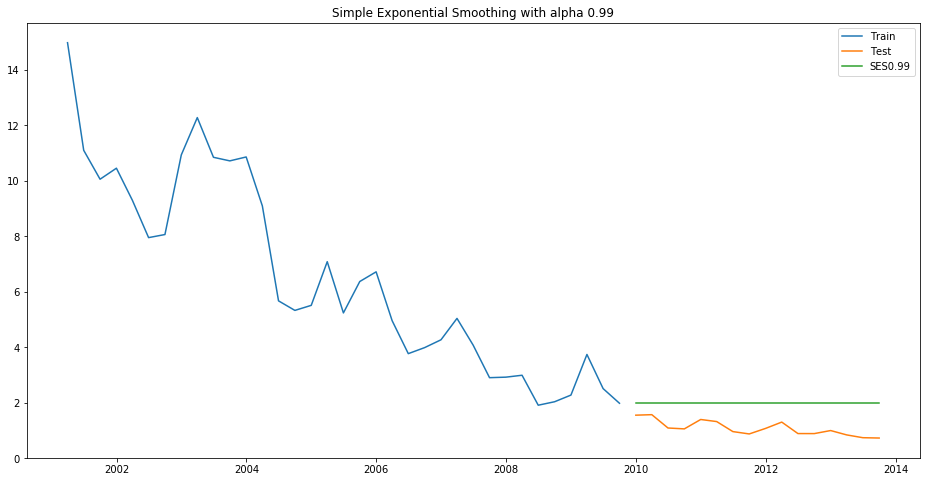

In [8]:
# fit model

alpha_list = [0.1, 0.5, 0.99]

pred_SES  = test.copy() # Have a copy of the test dataset

for alpha_value in alpha_list:

    alpha_str            =  "SES" + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)
    pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Consumption']))
    rmse                 =  np.sqrt(mean_squared_error(test['Consumption'], pred_SES[alpha_str]))
    mape                 =  MAPE(test['Consumption'],pred_SES[alpha_str])
###
    print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    plt.figure(figsize=(16,8))
    plt.plot(train.TimeIndex, train['Consumption'], label ='Train')
    plt.plot(test.TimeIndex, test['Consumption'], label  ='Test')
    plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
    plt.legend(loc='best') 
    plt.show()

Let us get the optimum value for $\alpha$ by omitting the value and leave it for the model to decide.


== Simple Exponential Smoothing 


Smoothing Level 1.0
Initial Level 14.978

For alpha = 1.00,  RMSE is 0.9386 MAPE is 83.39


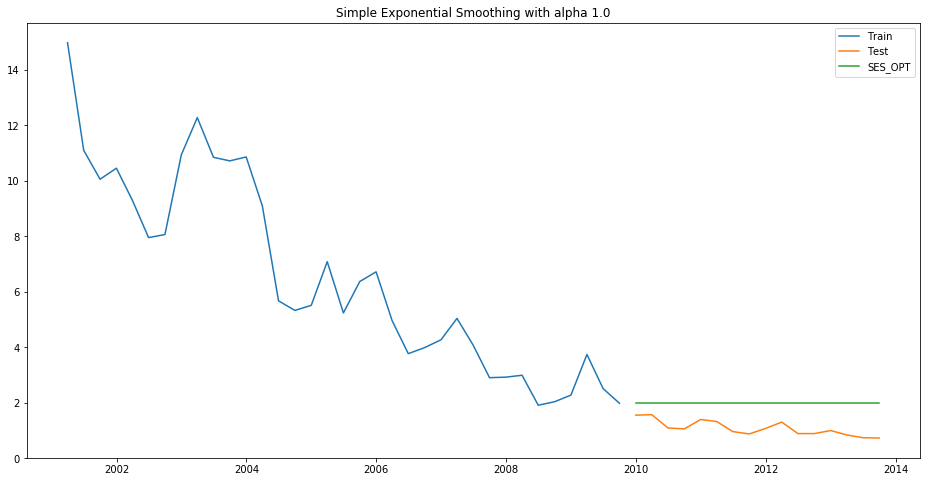

            35       36       37       38       39
Y      1.55221  1.57034  1.08986  1.05821  1.39665
Y_hat  1.98159  1.98159  1.98159  1.98159  1.98159


In [9]:
pred_opt   =  SimpleExpSmoothing(train['Consumption']).fit(optimized = True)
print('')
print('== Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(pred_opt.params['smoothing_level'], 4))
print('Initial Level',   np.round(pred_opt.params['initial_level'], 4))
print('')

y_pred_opt           = pred_opt.forecast(steps = 16)
df_pred_opt          = pd.DataFrame({'Y_hat':y_pred_opt,'Y':test['Consumption'].values})

rmse_opt             =  np.sqrt(mean_squared_error(test['Consumption'], y_pred_opt))
mape_opt             =  MAPE(test['Consumption'], y_pred_opt)

alpha_value          = np.round(pred_opt.params['smoothing_level'], 4)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

plt.figure(figsize=(16,8))
plt.plot(train.TimeIndex, train['Consumption'], label = 'Train')
plt.plot(test.TimeIndex, test['Consumption'],  label = 'Test')
plt.plot(test.TimeIndex, y_pred_opt,           label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

print(df_pred_opt.head().T)

### Inference

We observe that for the optimum $\alpha$ value, both RMSE and MAPE are smallest when compared to other $\alpha$ values of 0.1,0.5 and 0.99.

### Practice Exercise 1

* In the example 2, change the Split ratio as 75:25.
* Use Single Exponential Smoothing method to forecast sales for the test data using the optimum smoothing level.
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the single exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES and also known as Double Exponential model
* Applicable when data has Trend but no seasonality
* Two separate components are considered: Level and Trend
* Level is the local mean
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

### Example 3

* Use the data in example 2 and use Double Exponential Smoothing method to forecast sales for the test data
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')
                               0      

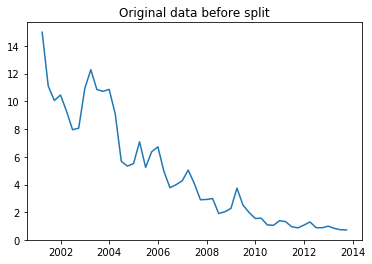


 Training data start at 

   Year Quarter  Consumption  TimeIndex
0  2001      Q1       14.978 2001-03-31 ['Year', 'Quarter']

 Training data ends at 

    Year Quarter  Consumption  TimeIndex
34  2009      Q3      1.98159 2009-09-30 ['Year', 'Quarter']

 Test data start at 

    Year Quarter  Consumption  TimeIndex
35  2009      Q4      1.55221 2009-12-31 ['Year', 'Quarter']

 Test data ends at 

    Year Quarter  Consumption  TimeIndex
50  2013      Q3      0.72823 2013-09-30 ['Year', 'Quarter']


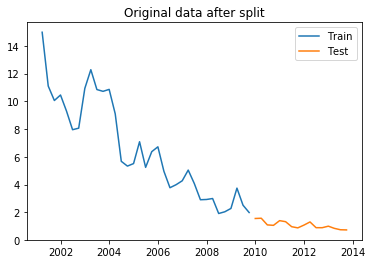

In [7]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

Petrol              =  pd.read_csv('Petrol.csv')

date_rng            =  pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
print(date_rng)

Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
print(Petrol.head(3).T)

plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.title('Original data before split')
plt.show()

#Creating train and test set 

train             = Petrol[0:int(len(Petrol)*0.7)] 
test              = Petrol[int(len(Petrol)*0.7):]

print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Quarter'])
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Quarter'])

print("\n Test data start at \n")
print (test[test.TimeIndex == test.TimeIndex.min()],['Year','Quarter'])

print("\n Test data ends at \n")
print (test[test.TimeIndex == test.TimeIndex.max()],['Year','Quarter'])

plt.plot(train.TimeIndex, train.Consumption, label = 'Train')
plt.plot(test.TimeIndex, test.Consumption,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

In [8]:
model = Holt(np.asarray(train['Consumption']))

model_fit = model.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value )
print('Smoothing Slope', np.round(model_fit.params['smoothing_slope'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')



==Holt model Exponential Smoothing Parameters ==

Smoothing Level 1.0
Smoothing Slope 0.02
Initial Level 15.1271



In [9]:
Pred_Holt = test.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test['Consumption']))

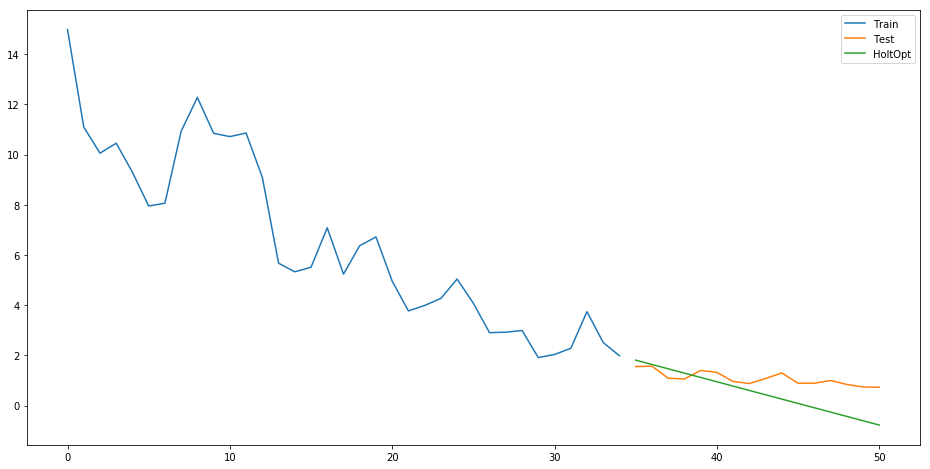

In [10]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [11]:
df_pred_opt          =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Consumption'].values})

rmse_opt             =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
mape_opt             =  MAPE(df_pred_opt.Y, df_pred_opt.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 1.00,  RMSE is 0.8283 MAPE is 63.01


#### Print the model parameters

In [12]:
print(model_fit.params)

{'smoothing_level': 1.0, 'smoothing_slope': 0.019969001307085045, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 15.127123152052901, 'initial_slope': 0.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Inference

For the same pertol data, we have tried both SES and HOLT model.

| Model | RMSE | MAPE |
| ----- | ------ | ----- |
| SES |  0.9386  | 83.39 |
| Holt | 0.8283 | 63.01 |  

Note the decrease in both RMSE and MAPE for the HOLT model.

### Practice Exercise 2

** Use data in Example 3. **

* Make the changes to model fit parameters as follows:

* smoothing_level = 0.3
* smoothing_slope = 0.1
* optimized       = False

* Build the model using the training data (Same split as in example 3)
* Evaluate the model performance by calculating the values of RMSE and MAPE.
* Plot the forecasted values along with original values.
* Is there any improvement or degradation in predicting the values?

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

### Multi-Steps Forecast

### Example 4

* Use the data in example 2.
* Build the Holt Winter's linear method with additive errors model to forecast sales for the test data
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')
                               0      

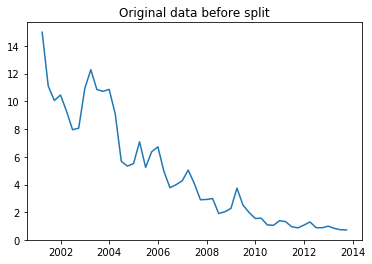


 Training data start at 

   Year Quarter  Consumption  TimeIndex
0  2001      Q1       14.978 2001-03-31 ['Year', 'Quarter']

 Training data ends at 

    Year Quarter  Consumption  TimeIndex
34  2009      Q3      1.98159 2009-09-30 ['Year', 'Quarter']

 Test data start at 

    Year Quarter  Consumption  TimeIndex
35  2009      Q4      1.55221 2009-12-31 ['Year', 'Quarter']

 Test data ends at 

    Year Quarter  Consumption  TimeIndex
50  2013      Q3      0.72823 2013-09-30 ['Year', 'Quarter']


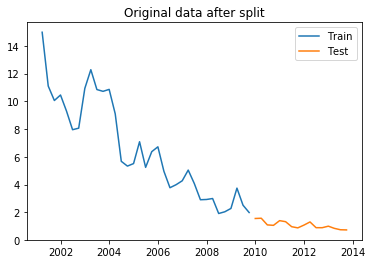

In [13]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

Petrol              =  pd.read_csv('Petrol.csv')

date_rng            =  pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
print(date_rng)

Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
print(Petrol.head(3).T)

plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.title('Original data before split')
plt.show()

#Creating train and test set 

train             = Petrol[0:int(len(Petrol)*0.7)] 
test              = Petrol[int(len(Petrol)*0.7):]

print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Quarter'])
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Quarter'])

print("\n Test data start at \n")
print (test[test.TimeIndex == test.TimeIndex.min()],['Year','Quarter'])

print("\n Test data ends at \n")
print (test[test.TimeIndex == test.TimeIndex.max()],['Year','Quarter'])

plt.plot(train.TimeIndex, train.Consumption, label = 'Train')
plt.plot(test.TimeIndex, test.Consumption,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

In [15]:
pred1 = ExponentialSmoothing(np.asarray(train['Consumption']), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods = 12).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred1.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred1.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))
print('')

### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 16)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Consumption']})
print(df_pred1)



== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.6842
Smoothing Slope:  0.0526
Smoothing Seasonal:  0.3158
Initial Level:  9.7042
Initial Slope:  0.0
Initial Seasons:  [ 5.2738  1.3948  0.3528  0.7498 -0.4092 -1.7522 -1.6412  1.2288  2.5738
  1.1428  1.0138  1.1548]

       Y_hat        Y
35  2.151906  1.55221
36  3.681970  1.57034
37  1.838157  1.08986
38  0.692226  1.05821
39  0.745242  1.39665
40  0.443467  1.32161
41 -1.621474  0.96034
42 -1.827606  0.87553
43 -0.774098  1.07530
44  0.389482  1.30285
45 -0.585050  0.88939
46 -0.461132  0.88818
47 -0.504579  0.99804
48  1.025485  0.84120
49 -0.818328  0.74032
50 -1.964259  0.72823


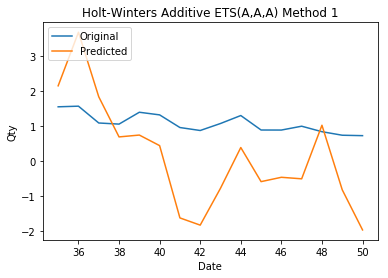

In [16]:
### Plot

fig2, ax = plt.subplots()
ax.plot(df_pred1.Y, label='Original')
ax.plot(df_pred1.Y_hat, label='Predicted')

plt.legend(loc='upper left')
plt.title('Holt-Winters Additive ETS(A,A,A) Method 1')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

In [17]:
rmse    =  np.sqrt(mean_squared_error(df_pred1.Y, df_pred1.Y_hat))
mape    =  MAPE(df_pred1.Y, df_pred1.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))

For alpha = 0.68,  RMSE is 1.5988 MAPE is 128.21


In [18]:
print(pred1.params)

{'smoothing_level': 0.6842105263157894, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.3157894736842105, 'damping_slope': nan, 'initial_level': 9.704173333333333, 'initial_slope': 0.0, 'initial_seasons': array([ 5.27382667,  1.39482667,  0.35282667,  0.74982667, -0.40917333,
       -1.75217333, -1.64117333,  1.22882667,  2.57382667,  1.14282667,
        1.01382667,  1.15482667]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


We observe that MAPE for Holt-Winters Additive ETS(A,A,A) Method is 128.21 and it is very much higher than (63.01) ETS(A, A, N) - Holt's Model.

We will try with  Air Passengers data.

In [19]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

AirPax              =  pd.read_csv('AirPax.csv')
date_rng            = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
print(date_rng)

AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
print(AirPax.head())

#Creating train and test set 

train             = AirPax[0:int(len(AirPax)*0.7)] 
test              = AirPax[int(len(AirPax)*0.7):]

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')
   Year Month  Pax  TimeIndex
0  1949   Jan  112 1949-01-31
1  1949   Feb  118 1949-02-28
2  1949   Mar  132 1949-03-31
3  1949   Apr  129 1949-04-30
4  1949   May  121 1949-05-31



 Training data start at 

   Year Month  Pax  TimeIndex
0  1949   Jan  112 1949-01-31 ['Year', 'Month']

 Training data ends at 

    Year Month  Pax  TimeIndex
99  1957   Apr  348 1957-04-30 ['Year', 'Month']

 Test data start at 

     Year Month  Pax  TimeIndex
100  1957   May  355 1957-05-31 ['Year', 'Month']

 Test data ends at 

     Year Month  Pax  TimeIndex
143  1960   Dec  432 1960-12-31 ['Year', 'Month']


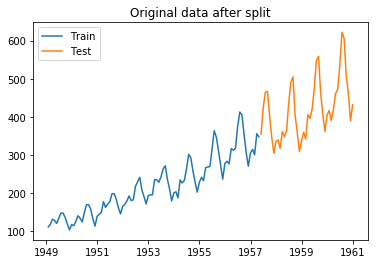

In [22]:
print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Month'])
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Month'])

print("\n Test data start at \n")
print (test[test.TimeIndex == test.TimeIndex.min()],['Year','Month'])

print("\n Test data ends at \n")
print (test[test.TimeIndex == test.TimeIndex.max()],['Year','Month'])

plt.plot(train.TimeIndex, train.Pax, label = 'Train')
plt.plot(test.TimeIndex, test.Pax,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

In [20]:
pred = ExponentialSmoothing(np.asarray(train['Pax']),
                                  seasonal_periods=12 ,seasonal='add').fit(optimized=True)

print(pred.params)

print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred.params['initial_seasons'], 4))
print('')


{'smoothing_level': 0.3684210502563661, 'smoothing_slope': 0.0, 'smoothing_seasonal': 0.6315789449932082, 'damping_slope': nan, 'initial_level': 189.65932331906893, 'initial_slope': nan, 'initial_seasons': array([ -81.22627752,  -74.21890772,  -60.99015764,  -66.80242815,
        -75.91701825,  -62.63279176,  -51.06459444,  -54.36004657,
        -69.00645028,  -87.69231957, -101.13892897,  -82.1752475 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}

== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.3684
Smoothing Slope:  0.0
Smoothing Seasonal:  0.6316
Initial Level:  189.6593
Initial Slope:  nan
Initial Seasons:  [ -81.2263  -74.2189  -60.9902  -66.8024  -75.917   -62.6328  -51.0646
  -54.36    -69.0065  -87.6923 -101.1389  -82.1752]



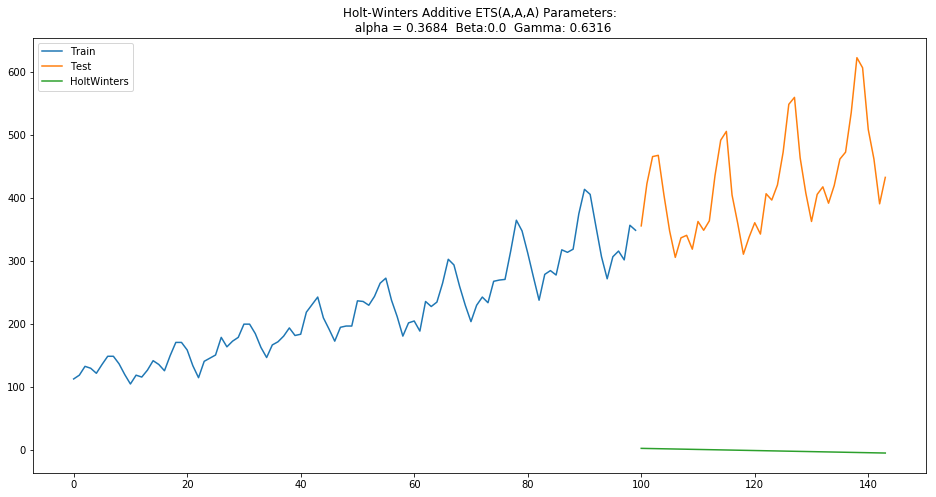

In [23]:
pred_HoltW = test.copy()
pred_HoltW['HoltW'] = model_fit.forecast(len(test['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(pred_HoltW['HoltW'], label='HoltWinters')
plt.title('Holt-Winters Additive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(np.round(pred.params['smoothing_slope'], 4)) +
          '  Gamma: ' + str(np.round(pred.params['smoothing_seasonal'], 4)))
plt.legend(loc='best')
plt.show()

In [24]:
df_pred_opt =  pd.DataFrame({'Y_hat':pred_HoltW['HoltW'] ,'Y':test['Pax'].values})

rmse_opt    =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
mape_opt    =  MAPE(df_pred_opt.Y, df_pred_opt.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.37,  RMSE is 430.0129 MAPE is 100.45



### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

### Multi-Steps Forecast

### Example 4

Use Air Passengers data and fit ETS(A, A, M)  model to predict the last 12 months.
* Build the Holt Winter's lETS(A, A, M) model to forecast sales for the test data
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.


In [25]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

AirPax              =  pd.read_csv('AirPax.csv')
date_rng            = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
print(date_rng)

AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
print(AirPax.head())

#Creating train and test set 

train             = AirPax[0:int(len(AirPax)*0.7)] 
test              = AirPax[int(len(AirPax)*0.7):]

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')
   Year Month  Pax  TimeIndex
0  1949   Jan  112 1949-01-31
1  1949   Feb  118 1949-02-28
2  1949   Mar  132 1949-03-31
3  1949   Apr  129 1949-04-30
4  1949   May  121 1949-05-31


ETS(A, A, M) model

In [27]:
pred = ExponentialSmoothing(np.asarray(train['Pax']),
                                  seasonal_periods=12 ,seasonal='multiplicative').fit(optimized=True)

print(pred.params)

print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred.params['initial_seasons'], 4))
print('')

{'smoothing_level': 0.78947368421052633, 'smoothing_slope': 0.0, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 198.22222905079516, 'initial_slope': nan, 'initial_seasons': array([ 0.5560357 ,  0.56219354,  0.66415202,  0.65258204,  0.64860015,
        0.71690669,  0.76929251,  0.7466192 ,  0.66682675,  0.58730703,
        0.50851541,  0.58023315]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}

== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.7895
Smoothing Slope:  0.0
Smoothing Seasonal:  0.2105
Initial Level:  198.2222
Initial Slope:  nan
Initial Seasons:  [ 0.556   0.5622  0.6642  0.6526  0.6486  0.7169  0.7693  0.7466  0.6668
  0.5873  0.5085  0.5802]



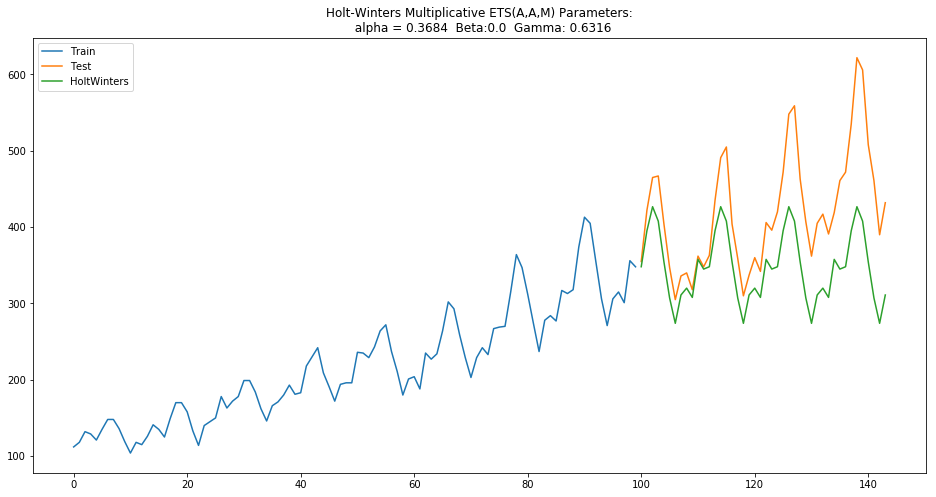

In [26]:
pred_HoltW = test.copy()

pred_HoltW['HoltWM'] = pred.forecast(len(test['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(pred_HoltW['HoltWM'], label='HoltWinters')
plt.title('Holt-Winters Multiplicative ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(np.round(pred.params['smoothing_slope'], 4)) +
          '  Gamma: ' + str(np.round(pred.params['smoothing_seasonal'], 4)))
plt.legend(loc='best')
plt.show()

### Report model accuracy

In [27]:
df_pred_opt =  pd.DataFrame({'Y_hat':pred_HoltW['HoltWM'] ,'Y':test['Pax'].values})

rmse_opt    =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
mape_opt    =  MAPE(df_pred_opt.Y, df_pred_opt.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.37,  RMSE is 89.1980 MAPE is 17.47


#### Inference

**MAPE of ETS(A,A,M) model is 16.92 and it is lesser than 17.47, MAPE of  ETS(A,A,A) model, **

Hence, prediction of Holt-Winter - Additive Trend and Multiplicative Seasonality model is better than Holt-Winter - Additive model 

## Model finalization

### Shampoo Sales Dataset

This dataset describes the monthly number of sales of shampoo over a 3 year period.
The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998).

The entire dataset is taken from Data Market.

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period

### Example 5

* Split the data into train and test. 
* Build different time series models on train data set and test it on test data set
* Compare models performance.


In [38]:
import pandas            as     pd 
import numpy             as     np 
from   sklearn.metrics   import mean_squared_error
from   math              import sqrt
import matplotlib.pyplot as     plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [39]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [42]:
#Importing data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
df = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], squeeze=True, date_parser=parser)

print(df.head())
df.plot()


       Month  Sales
0 1901-01-01  266.0
1 1901-02-01  145.9
2 1901-03-01  183.1
3 1901-04-01  119.3
4 1901-05-01  180.3


ValueError: view limit minimum -34625.98499999999 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002162E959D90> (for post_execute):


ValueError: view limit minimum -34625.98499999999 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -34625.98499999999 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [43]:
df.Timestamp = pd.to_datetime(df.Month, format='%Y-%m') 
df.index     = df.Timestamp 

### Creating train and test set 

In [44]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

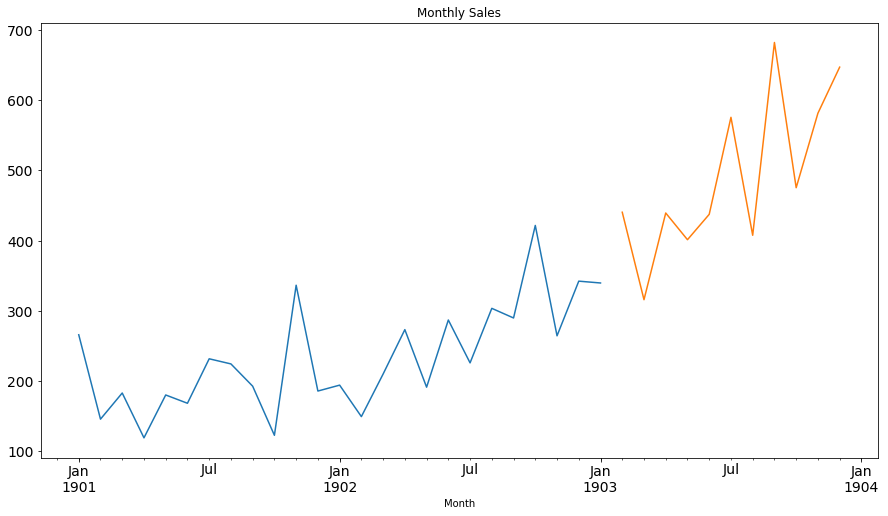

In [45]:
### Plot data

train['Sales'].plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)
test['Sales'].plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)

In [46]:
df.head()

,Month,Sales
Month,,
1901-01-01,1901-01-01,266.0
1901-02-01,1901-02-01,145.9
1901-03-01,1901-03-01,183.1
1901-04-01,1901-04-01,119.3
1901-05-01,1901-05-01,180.3


### Method  1: Regression on Time

In [47]:
df1         =   df.copy() # Make a copy

time        = [i+1 for i in range(len(df))]
df1['time'] = time
monthDf     = df1[['Month']]

df1.drop('Month', axis=1, inplace=True)
df1.head(2)

,Sales,time
Month,,
1901-01-01,266.0,1
1901-02-01,145.9,2


In [48]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [49]:
x_train = train.drop('Sales', axis=1)
x_test  = test.drop('Sales', axis=1)
y_train = train[['Sales']]
y_test  = test[['Sales']]

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

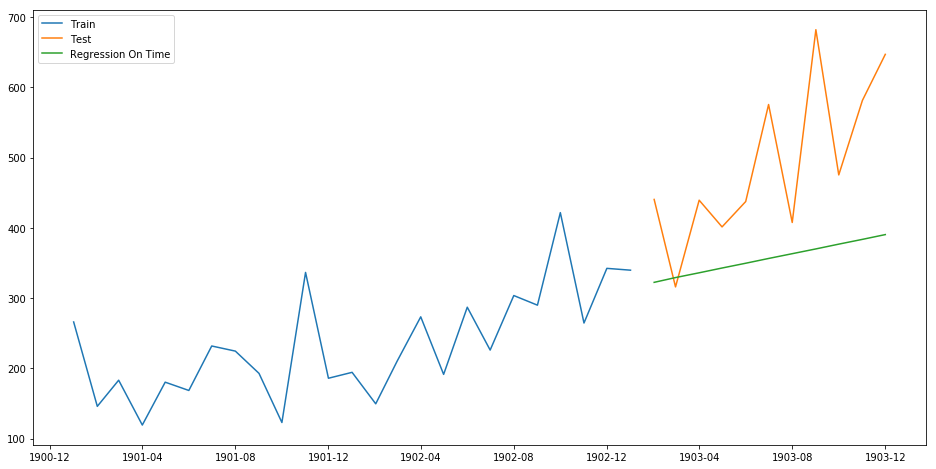

In [53]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [54]:
rmse = sqrt(mean_squared_error(test.Sales, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Sales, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 164.563 MAPE is 27.94


In [55]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf

,Method,rmse,mape
0,RegressionOnTime,164.563,27.94


### Method 2: Regression on Time With Seasonal Components

In [56]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time
print(df1.head())
print(df1.shape[0])
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

                Month  Sales  time
Month                             
1901-01-01 1901-01-01  266.0     1
1901-02-01 1901-02-01  145.9     2
1901-03-01 1901-03-01  183.1     3
1901-04-01 1901-04-01  119.3     4
1901-05-01 1901-05-01  180.3     5
36


In [57]:
df1['monthSeasonality'] = monthSeasonality * 3
df1.head()

,Month,Sales,time,monthSeasonality
Month,,,,
1901-01-01,1901-01-01,266.0,1,m1
1901-02-01,1901-02-01,145.9,2,m2
1901-03-01,1901-03-01,183.1,3,m3
1901-04-01,1901-04-01,119.3,4,m4
1901-05-01,1901-05-01,180.3,5,m5


In [58]:
monthDf = df1[['Month']]
df1.drop('Month', axis=1, inplace=True)

In [61]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(2).T

Month,1901-01-01 00:00:00,1901-02-01 00:00:00
Sales,266.0,145.9
time,1.0,2.0
monthSeasonality_m10,0.0,0.0
monthSeasonality_m11,0.0,0.0
monthSeasonality_m12,0.0,0.0
monthSeasonality_m2,0.0,1.0
monthSeasonality_m3,0.0,0.0
monthSeasonality_m4,0.0,0.0
monthSeasonality_m5,0.0,0.0
monthSeasonality_m6,0.0,0.0


In [62]:
#Creating train and test set 
train=df1Complete[0:int(len(df1Complete)*0.7)] 
test=df1Complete[int(len(df1Complete)*0.7):]

In [63]:
x_train  = train.drop('Sales', axis=1)
x_test   = test.drop('Sales', axis=1)
y_train  = train[['Sales']]
y_test   = test[['Sales']]

In [64]:
model    = LinearRegression()

In [65]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
predictions = model.predict(x_test)

In [67]:
y_test['RegOnTimeSeasonal'] = predictions

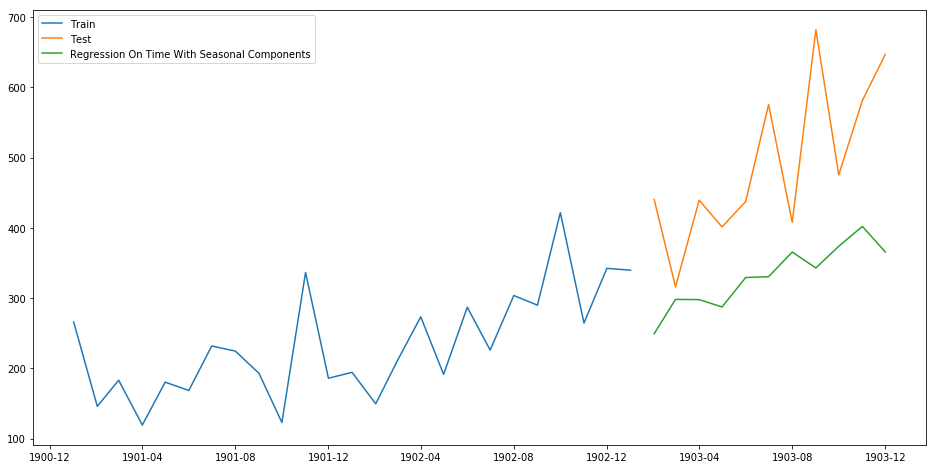

In [68]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [69]:
rmse = sqrt(mean_squared_error(test.Sales, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
mape = MAPE(test.Sales, y_test.RegOnTimeSeasonal)
print("For RegOnTimeSeasonal,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegOnTimeSeasonal,  RMSE is 185.864 MAPE is 32.59


In [70]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,164.563,27.94
0,RegressionOnTimeSeasonal,185.864,32.59


### Method 3: Naive Approach: $\hat{y}_{t+1} = y_t$


In [71]:
dd= np.asarray(train.Sales)

In [72]:
y_hat = test.copy()

In [73]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5,1,'Naive Forecast')

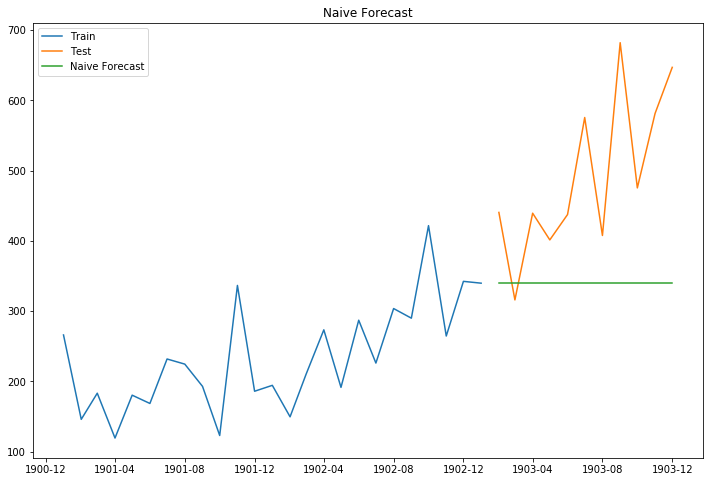

In [74]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index,test['Sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [75]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Sales, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 186.469 MAPE is 31.72


In [76]:
tempResultsDf = pd.DataFrame({'Method':['Naive model'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,164.563,27.94
0,RegressionOnTimeSeasonal,185.864,32.59
0,Naive model,186.469,31.72


We can infer from the RMSE and MAPE values and the graphs above, that Naive method and Regression on Time With Seasonal Components model are not suited for datasets with high variability. 

Naive method is best suited for stable datasets. We can still improve our score by adopting different techniques. 

Now we will look at another technique and try to improve our score.

### Method 4: Simple Average

In [77]:
y_hat_avg = test.copy()

In [78]:
y_hat_avg['avg_forecast'] = train['Sales'].mean()

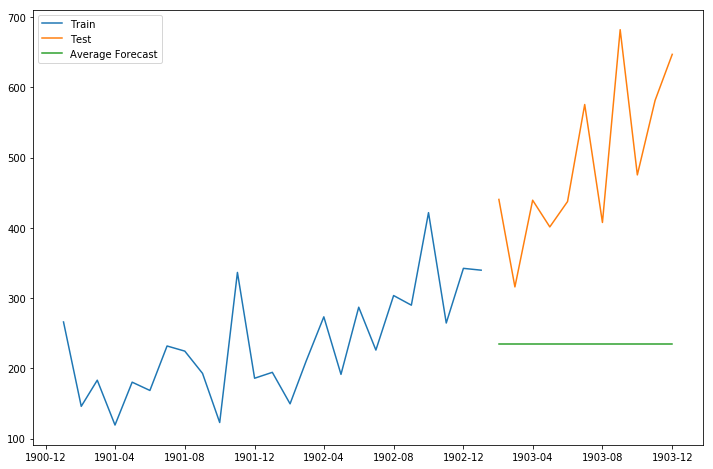

In [79]:
plt.figure(figsize=(12,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [80]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Sales, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 279.196 MAPE is 52.35


In [81]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,164.563,27.94
0,RegressionOnTimeSeasonal,185.864,32.59
0,Naive model,186.469,31.72
0,Simple Average,279.196,52.35


### Inference

We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not.

## Method 5: Moving Average(MA)

In [82]:
df1 = df.copy()

In [83]:
df1['moving_avg_forecast_4']  = df['Sales'].rolling(4).mean()
df1['moving_avg_forecast_6']  = df['Sales'].rolling(6).mean()
df1['moving_avg_forecast_8']  = df['Sales'].rolling(8).mean()
df1['moving_avg_forecast_12'] = df['Sales'].rolling(12).mean()

For Simple Average model, moving_avg_forecast_4  RMSE is 75.514 MAPE is 13.05
For Simple Average model, moving_avg_forecast_6  RMSE is 88.576 MAPE is 14.62
For Simple Average model, moving_avg_forecast_8  RMSE is 105.158 MAPE is 17.03
For Simple Average model, moving_avg_forecast_12  RMSE is 134.071 MAPE is 22.79


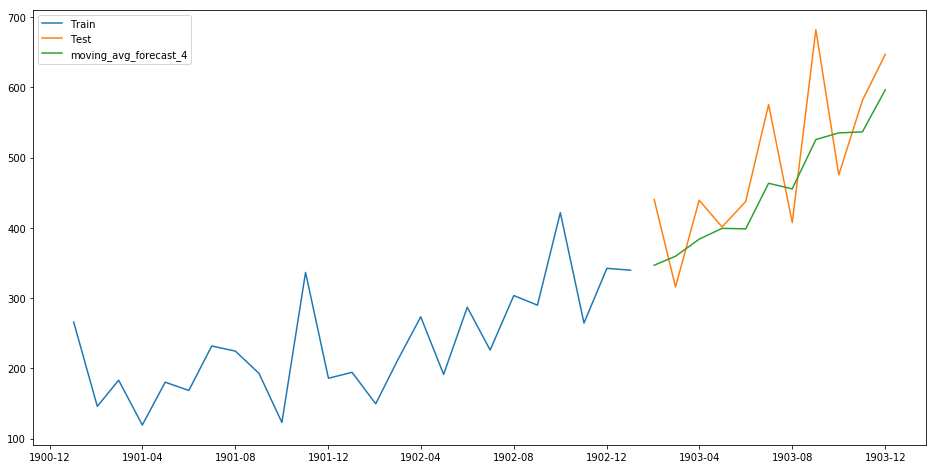

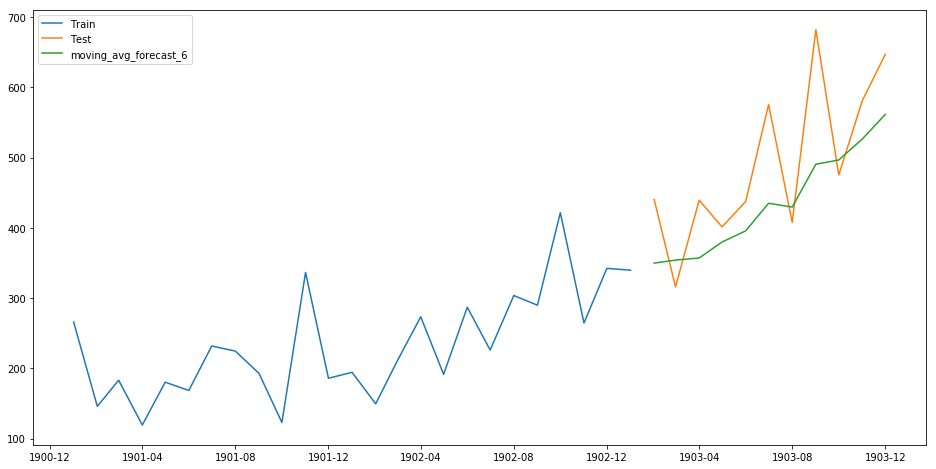

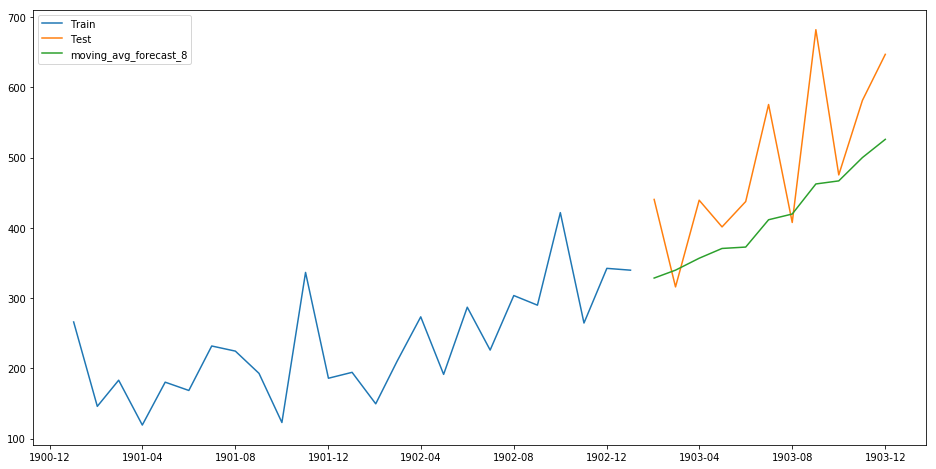

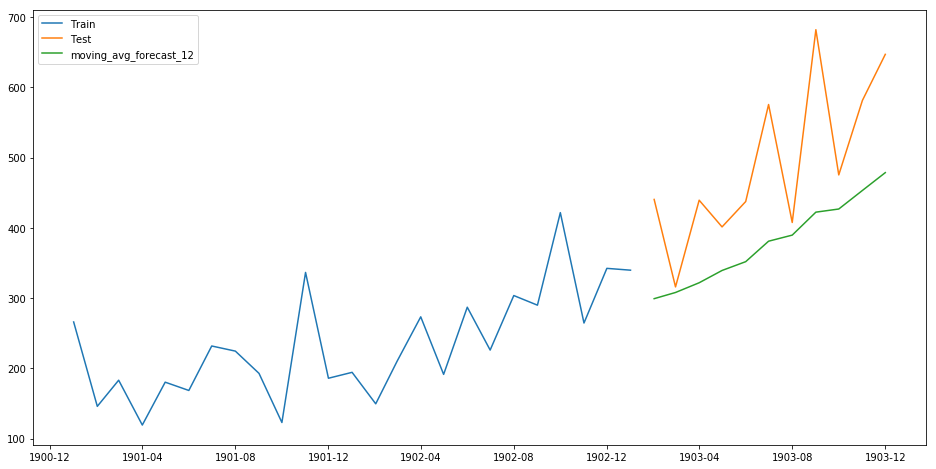

In [72]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Sales'], label='Train')
    plt.plot(test['Sales'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Sales, y_hat_avg[col_name])
    print("For Simple Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'rmse': [rmse], 'mape' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [84]:
print(resultsDf)

                     Method     rmse   mape
0          RegressionOnTime  164.563  27.94
0  RegressionOnTimeSeasonal  185.864  32.59
0               Naive model  186.469  31.72
0            Simple Average  279.196  52.35


So far, the moving average of window width 4 gives the lowest MAPE and RMSE.
Let us try other models as well.

### Method 6: Simple Exponential Smoothing

In [85]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [86]:
# create class
model = SimpleExpSmoothing(train['Sales'])

In [87]:
model_fit = model.fit(optimized = True)

In [88]:
print('')
print('== Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing 


Smoothing Level 0.2955
Initial Level 196.3511



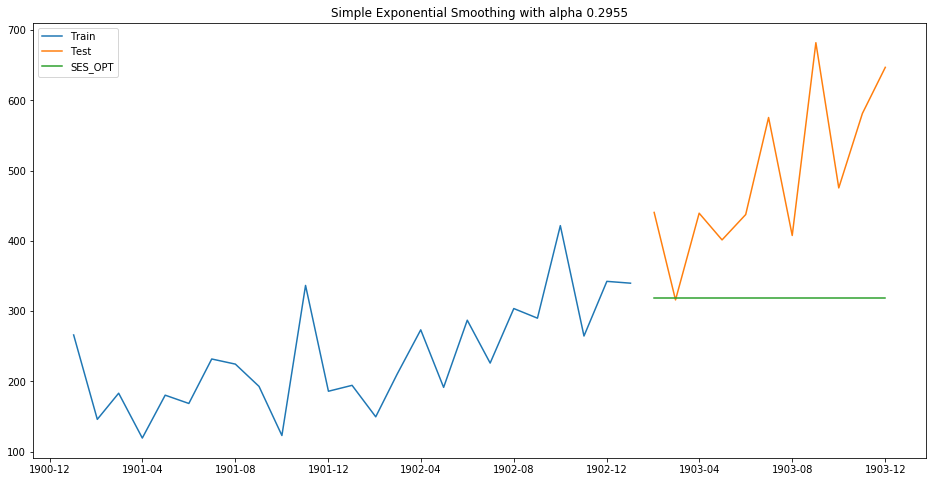

In [89]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Sales']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Sales'], label = 'Train')
plt.plot(test.index, test['Sales'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [90]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sales'], y_hat_avg.SES))
mape_opt             =  MAPE(test['Sales'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.30,  RMSE is 203.7065 MAPE is 35.18


In [91]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [92]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime  164.563000  27.94
0  RegressionOnTimeSeasonal  185.864000  32.59
0               Naive model  186.469000  31.72
0            Simple Average  279.196000  52.35
0                       SES  203.706465  35.18


### Method 7: Holt's Linear Trend Method (Double Exponential Smoothing)

In [93]:
import statsmodels.api as sm

In [94]:
y_hat_avg = test.copy()

In [95]:
model_fit = Holt(np.asarray(train['Sales'])).fit()

In [96]:
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [97]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.5263
Smoothing Slope 0.5263
Initial Level 266.0



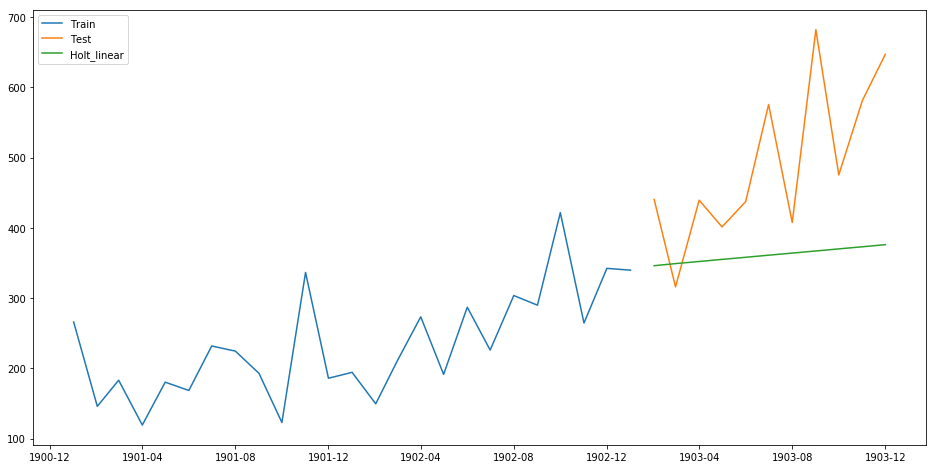

In [98]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [99]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Holt_linear']))
mape_opt             =  MAPE(test['Sales'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.53,  RMSE is 165.4147 MAPE is 27.72


In [100]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_linear', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [101]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime  164.563000  27.94
0  RegressionOnTimeSeasonal  185.864000  32.59
0               Naive model  186.469000  31.72
0            Simple Average  279.196000  52.35
0                       SES  203.706465  35.18
0               Holt_linear  165.414720  27.72


### Inference

The model is slightly better than SES model but worse than all moving average models.

### Method 8: Holt-Winters Method - Additive seasonality

In [102]:
y_hat_avg = test.copy()

In [103]:
model_fit = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [104]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

In [105]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.3684
Smoothing Slope:  0.0
Smoothing Seasonal:  0.0
Initial Level:  246.2472
Initial Slope:  4.9324
Initial Seasons:  [ -40.3648 -130.0833  -87.6159 -100.0524 -107.7839  -76.946   -74.0969
  -48.7551  -77.5722  -62.9057  -19.3893  -73.4958]



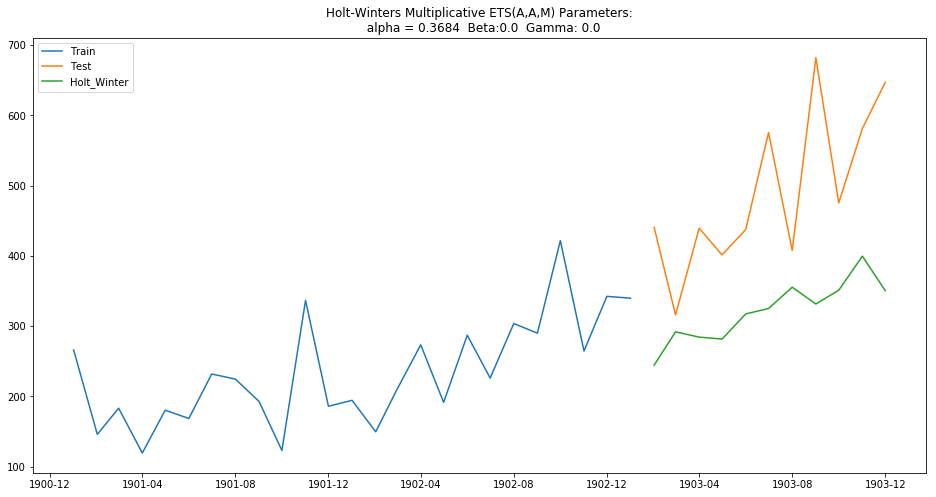

In [106]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Multiplicative ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [107]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Holt_Winter']))
mape_opt             =  MAPE(test['Sales'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.37, beta = 0.00, gamma = 0.00, RMSE is 194.6100 MAPE is 34.63


In [108]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [109]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime  164.563000  27.94
0  RegressionOnTimeSeasonal  185.864000  32.59
0               Naive model  186.469000  31.72
0            Simple Average  279.196000  52.35
0                       SES  203.706465  35.18
0               Holt_linear  165.414720  27.72
0               Holt_Winter  194.610005  34.63


* Beta is the smoothing factor to trends and it is zero and this gives more weight to the old  trend. 
* Gamma is the smoothing factor to seasonal index and is it zero and this gives, more weight  to old seasonal periods. 

### Method 9: Holt-Winters Method - Multiplicative Model

In [110]:
y_hat_avg = test.copy()

In [111]:
model_fit = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [112]:
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

In [113]:
print('')
print('== Holt-Winters Additive ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(pred.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,M) Parameters ==

Smoothing Level:  0.3684
Smoothing Slope:  0.5263
Smoothing Seasonal:  nan
Initial Level:  266.0
Initial Slope:  0.0
Initial Seasons:  []



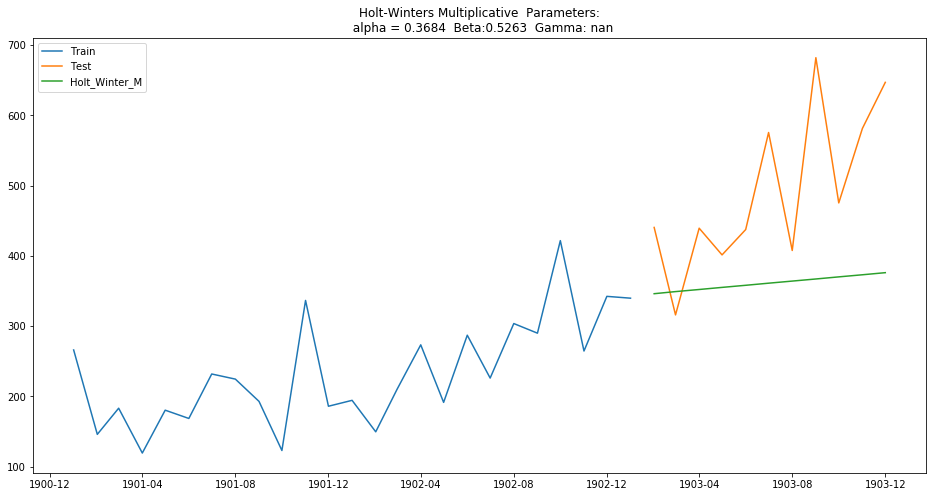

In [114]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [115]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Holt_Winter_M']))
mape_opt             =  MAPE(test['Sales'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.37, beta = 0.53, gamma = nan, RMSE is 165.4147 MAPE is 27.72


In [116]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [117]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime  164.563000  27.94
0  RegressionOnTimeSeasonal  185.864000  32.59
0               Naive model  186.469000  31.72
0            Simple Average  279.196000  52.35
0                       SES  203.706465  35.18
0               Holt_linear  165.414720  27.72
0               Holt_Winter  194.610005  34.63
0             Holt_Winter M  165.414720  27.72


### Inference

**As of now, we observe that Moving average of window width of 4 seems to be a good fit for the data.**

### Practice Exercise 3

Monthly totals of international airline passengers, 1949 to 1960. Represented in 1000s.
* Split the data into train and test. 
* Build different time series models on train data set and test it on test data set
* Compare the model performance.

In [123]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline

In [124]:
import warnings
warnings.filterwarnings("ignore")

In [125]:
#Importing data
df = pd.read_csv('airline-passengers.csv')

In [127]:
df.Timestamp = pd.to_datetime(df.Month,format='%Y-%m') 
df.index = df.Timestamp 

In [128]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


## AUTO REGRESSIVE Models

Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models. 

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970.

ARMA models are basically regression models; auto-regression means regression of a variable on itself measured at different time periods. 

The main assumption of AR model is that the time series data is stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

http://people.duke.edu/~rnau/411diff.htm

When the time series data is not stationary, then we convert the non-stationary data before applying AR models. 

### Lags

Taking the difference between consecutive observations is called a lag-1 difference.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

**White noise of the residuals:**

White noise is a process of residuals $\epsilon_t$ that are uncorrelated and follow normal distribution with mean 0 and constant standard deviation. In AR models, one of the main assumptions is the errors follow a white noise.

### Auto-Regressive  (AR) Models

Auto-Regression is a regression of a variable on itself measured at different time points. 
Auto-Regressive model with lag 1, AR(1) is given by 
* $Y_{t+1} = \beta Y_t + \epsilon_{t+1}$  and this same as
* $Y_{t+1} - \mu = \beta (Y_t - \mu) + \epsilon_{t+1}$  and this same as
* where $\epsilon_{t+1}$ is a sequence of uncorrelated residuals that follow normal distribution with zero mean and constant deviation. 
 * $Y_{t+1} - \mu$ is interpreted as a deviation from mean value $mu$ and known as mean centered series.



The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. 
The null hypothesis is that time series is non-stationary.
Alternative hypothesis is that time series is stationary.

### AR Model indentification


### Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)

#### Autocorrelation Function (ACF)

**A plot of auto-correlation of different lags is called ACF.**

The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

#### Partial Autocorrelation Function (PACF)

**A plot of partial auto-correlation for different values of lags is called PACF.**

The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

The number of lags is p when:
* The partial auto-correlation, |$\rho_{pk}$| > 1.96 / $\sqrt{n}$ for first p values and cuts off to zero. 
* The auto-correlation function, $\rho_k$ decreases exponentially.

*  The model is AR if the ACF trails oﬀ after a lag and has a hard cut-oﬀ in the PACF after a lag.    This lag is taken as the value for p.

*  The model is MA if the PACF trails oﬀ after a lag and has a hard cut-oﬀ in the ACF after the   lag. This lag value is taken as the value for q.

*  The model is a mix of AR and MA if both the ACF and PACF trail oﬀ.

* For an **ARIMA (p,d,q)** process, it becomes non-stationary to stationary after differencing it for **d** times.

### Plot ACF and PACF

In [129]:
import pandas                     as      pd
import calendar
from   statsmodels.tsa.stattools  import  adfuller
data            = pd.read_csv('TractorSales.csv', header=0, parse_dates=[0], squeeze=True)

dates           = pd.date_range(start='2003-01-01', freq='MS', periods=len(data))

data['Month']   = dates.month
data['Month']   = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year']    = dates.year

data.drop(['Month-Year'], axis=1, inplace=True)
data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)

data            = data[['Month', 'Year', 'Tractor-Sales']]
data.set_index(dates, inplace=True)

sales_ts = data['Tractor-Sales']

result            = adfuller(sales_ts) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

ADF Statistic: 1.108825
p-value: 0.995291


This series is not stationary.
Try differencing - lag 1

In [130]:
sales_ts_diff     = sales_ts - sales_ts.shift(periods=1)
sales_ts_diff.dropna(inplace=True)

result            = adfuller(sales_ts_diff) 

pval              = result[1]
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

if pval < 0.05:
    print('Data is stationary')
else:
    print('Data after differencing is not stationary; so try log diff')
    sales_ts_log      = np.log10(sales_ts)
    sales_ts_log.dropna(inplace=True)
    sales_ts_log_diff = sales_ts_log.diff(periods=1)
    sales_ts_log_diff.dropna(inplace=True)
    result            = adfuller(sales_ts_log_diff) 

    pval              = result[1]
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1]) 
    if pval < 0.05:
        print('Data after log differencing is stationary')
    else:
        print('Data after log differencing is not stationary; try second order differencing')
        sales_ts_log_diff2 = sales_ts_log.diff(periods = 2)
        sales_ts_log_diff2.dropna(inplace=True)
        result         =   adfuller(sales_ts_log_diff2) 
        pval              = result[1]
        print('ADF Statistic: %f' % result[0]) 
        print('p-value: %f' % result[1]) 
        if pval < 0.05:
            print('Data after log differencing 2nd order is stationary')
        else:
            print('Data after log differencing 2nd order is not stationary')
            
        
        

ADF Statistic: -2.543481
p-value: 0.105250
Data after differencing is not stationary; so try log diff
ADF Statistic: -2.680467
p-value: 0.077480
Data after log differencing is not stationary; try second order differencing
ADF Statistic: -3.200722
p-value: 0.019943
Data after log differencing 2nd order is stationary


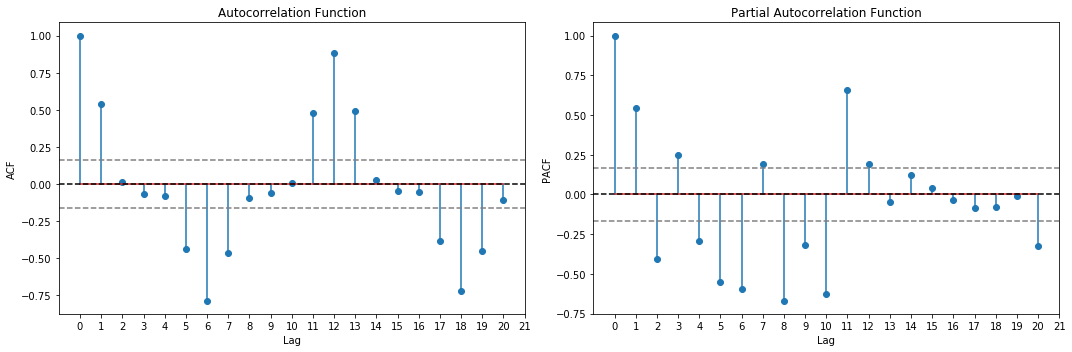

In [114]:
#ACF and PACF plots:
from   statsmodels.tsa.stattools     import acf, pacf
import matplotlib.pyplot             as     plt


lag_acf    =   acf(sales_ts_log_diff2,   nlags=20)
lag_pacf   =   pacf(sales_ts_log_diff2, nlags=20, method='ols')

#Plot ACF: 

plt.figure(figsize = (15,5))
plt.subplot(121) 
plt.stem(lag_acf)
plt.axhline(y = 0, linestyle='--',color='black')
plt.axhline(y = -1.96/np.sqrt(len(sales_ts_log_diff2)),linestyle='--',color='gray')
plt.axhline(y = 1.96/np.sqrt(len(sales_ts_log_diff2)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
#Plot PACF:

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y =-1.96/np.sqrt(len(sales_ts_log_diff2)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(sales_ts_log_diff2)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



plt.show()

Look at the ACF and PACF plots of the log differenced series.
* Observe our first significant value at lag 5 for ACF 
* Our significant value is at the lag 2 for the PACF
* These values suggest us to use p = 2 and q = 5.

**Here d = 2 since we could get stationary only when we did differencing twice on the log values.**


### Take home Exercises

####  Excercise 1

Use Environmental CO2 Emission Series data and 
* Split the data into train and test. 
* Build different time series models on train data set and test it on test data set
* Compare the model performance.

In [131]:
import pandas as pd
import calendar

Emission = pd.read_csv("Emission.csv")
Emission.head(5)

dates = pd.date_range(start='1973-01-01', freq='MS', periods=len(Emission))

Emission['Month'] = dates.month
Emission['Month'] = Emission['Month'].apply(lambda x: calendar.month_abbr[x])
Emission['Year']  = dates.year

Emission.set_index(dates, inplace=True)
Emission.rename(columns={'CO2 Emission':'CO2-Emission'}, inplace=True)

print(Emission.head(5))

# extract out the time-series
print('\nsales_ts\n')
omission_ts = Emission['CO2-Emission']
print(omission_ts.head())

            Year Month  CO2-Emission
1973-01-01  1973   Jan       106.363
1973-02-01  1973   Feb       101.760
1973-03-01  1973   Mar       110.553
1973-04-01  1973   Apr       104.734
1973-05-01  1973   May       114.897

sales_ts

1973-01-01    106.363
1973-02-01    101.760
1973-03-01    110.553
1973-04-01    104.734
1973-05-01    114.897
Freq: MS, Name: CO2-Emission, dtype: float64


####  Excercise 2

You may be aware that grid search may not always give you the best model for ARIMA. 

To get the best model you may need to manually experiment with different parameters using the ACF/PACF plots.

Use AirPassengers.csv file to explore the above.


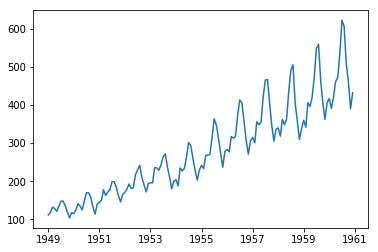

In [132]:
import   pandas            as      pd
import   matplotlib.pyplot as      plt

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data      =   pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month', date_parser = dateparse)
plt.plot(data) 
plt.show()

## END